# CAB420, Week 1 Practical - Question 2 Template
## Linear Regression

Using the dataset from Problem 1, split the data into training, validation and testing as follows:
* Training: All data from the years 2014-2016
* Validation: All data from 2017
* Training: All data from 2018

Develop a regression model to predict one of the cycleway data series in your dataset. In developing this model you should:
* Initially, use all weather data (temperature, rainfall and solar exposure) and all other data series for a particular counter type (i.e. if you’re predicting cyclists inbound for a counter, use all other cyclist inbound counters)
* Use p-values, qqplots, and performance on the validation set to remove terms and improve the model.

When you have finished refining the model, evaluate it on test set, and compare the Root Mean Squared Error (RMSE) for the training, validation and test sets.

In training the model, you will need to ensure that you have no samples (i.e. rows) with missing data. As such, you should remove samples with missing data from the dataset before training and evaluating the model. This may also mean that you have to remove some columns that contain large amounts of missing data.

### Relevant Examples

The first linear regression example, ``CAB420_Regression_Example_1_Linear_Regression.ipynb`` is a useful starting point here.

### Suggested Packages

The following packages are suggested, however there are many ways to approach things in python, if you'd rather use different pacakges that's cool too.

In [627]:
# numpy handles pretty much anything that is a number/vector/matrix/array
import numpy as np
# pandas handles dataframes
import pandas as pd
# matplotlib emulates Matlabs plotting functionality
import matplotlib.pyplot as plt
# seaborn is another good plotting library. In particular, I like it for heatmaps (https://seaborn.pydata.org/generated/seaborn.heatmap.html)
import seaborn as sns;
# stats models is a package that is going to perform the regression analysis
from statsmodels import api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
# os allows us to manipulate variables on out local machine, such as paths and environment variables
import os
# self explainatory, dates and times
from datetime import datetime, date
# a helper package to help us iterate over objects
import itertools

### Step 1: Load the data
This may be the data you created in Q1, or the pre-baked merged data.

Use pandas and the read_csv function to load the data. It is suggested you inspect the data after loading (print some of it, use the ``head()`` function, possibly plot some series) as a sanity check.

In [628]:
data = pd.read_csv("./combined.csv")
data.head(-5)

,Unnamed: 0,Rainfall amount (millimetres),Date,Maximum temperature (Degree C),Daily global solar exposure (MJ/m*m),North Brisbane Bikeway Mann Park Windsor Cyclists Outbound,Jack Pesch Bridge Pedestrians Outbound,Story Bridge East Pedestrian Inbound,Kedron Brook Bikeway Lutwyche Pedestrians Outbound,Kedron Brook Bikeway Mitchelton Pedestrian Outbound,...,Story Bridge East Pedestrian Outbound,North Brisbane Bikeway Mann Park Windsor Pedestrian Outbound,Story Bridge West Cyclists Inbound,Bicenntenial Bikeway,Story Bridge East Cyclists Inbound,Bishop Street Pedestrians Inbound,Story Bridge West Cyclists Outbound,North Brisbane Bikeway Mann Park Windsor Pedestrian Inbound,Kedron Brook Bikeway Mitchelton Pedestrian Inbound,Schulz Canal Bridge Cyclists Inbound
0,0,0.0,2014-01-01,30.6,31.2,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,0.0,3333.0,0.0,NaN,0.0,NaN,NaN,92.0
1,1,0.0,2014-01-02,31.8,23.4,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,0.0,4863.0,0.0,NaN,0.0,NaN,NaN,123.0
2,2,1.0,2014-01-03,34.5,29.6,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,0.0,3905.0,0.0,NaN,0.0,NaN,NaN,77.0
3,3,0.0,2014-01-04,38.7,30.5,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,0.0,3066.0,0.0,NaN,0.0,NaN,NaN,57.0
4,4,0.0,2014-01-05,33.6,15.7,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,0.0,4550.0,0.0,NaN,0.0,NaN,NaN,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,1816,3.0,2018-12-22,35.7,20.9,NaN,105.0,130.0,383.0,68.0,...,208.0,50.0,73.0,2171.0,114.0,153.0,NaN,85.0,66.0,48.0
1817,1817,0.0,2018-12-23,28.6,28.1,NaN,310.0,158.0,335.0,102.0,...,325.0,88.0,87.0,3448.0,143.0,103.0,NaN,123.0,100.0,89.0
1818,1818,0.0,2018-12-24,27.9,25.7,NaN,227.0,69.0,294.0,119.0,...,272.0,106.0,71.0,3050.0,115.0,77.0,NaN,169.0,137.0,57.0
1819,1819,0.2,2018-12-25,28.3,26.4,NaN,137.0,83.0,193.0,60.0,...,164.0,43.0,41.0,1931.0,70.0,44.0,NaN,84.0,65.0,21.0


### Step 2: Filter the data

As you inspect the data, you may see some series have fewer samples than others. Trying to find rows that have all data series may lead to having too little data for analysis. A suggested approach is:
* Loop through the columns in the table. You can use something like ``for column in mydata.columns.values:`` to do this iteration. For each column:
  * Get the number of NaNs in the column. The ``isna()`` function that operates of a pandas series could be useful here.
  * If the column has a number of NaNs above a threshold, flag it for removal
* After the loop, remove the columns. The ``drop()`` function in the pandas dataframe class that takes column names as an input could help here.

Be sure to check what's left in the table after your operations

After this, you should remove any final NaNs. The ``dropna()`` function in the pandas dataframe class could be of use here.

In [629]:
print(data.shape)
max_na = 300
filtered_data = data.dropna(axis=1, thresh= data.shape[0] - max_na)
print(filtered_data.shape)
filtered_data = filtered_data.dropna(axis=0)
print(filtered_data.shape)



(1826, 57)
(1826, 25)
(1422, 25)


In [630]:
filtered_data.head(-5)

,Unnamed: 0,Rainfall amount (millimetres),Date,Maximum temperature (Degree C),Daily global solar exposure (MJ/m*m),Story Bridge East Pedestrian Inbound,Schulz Canal Bridge Cyclists Outbound,Story Bridge West Pedestrian Outbound,Bicentennial Bikeway Pedestrians Inbound,Story Bridge West Pedestrian Inbound,...,Bicentennial Bikeway Pedestrians Outbound,Story Bridge East Cyclists Outbound,Bicentennial Bikeway Cyclists Outbound,Story Bridge East Pedestrian Outbound,North Brisbane Bikeway Mann Park Windsor Pedestrian Outbound,Story Bridge West Cyclists Inbound,Bicenntenial Bikeway,Story Bridge East Cyclists Inbound,North Brisbane Bikeway Mann Park Windsor Pedestrian Inbound,Schulz Canal Bridge Cyclists Inbound
169,169,0.0,2014-06-19,20.3,8.0,0.0,55.0,0.0,1630.0,0.0,...,1900.0,0.0,333.0,0.0,0.0,0.0,4223.0,0.0,0.0,60.0
170,170,5.8,2014-06-20,22.5,9.1,0.0,49.0,0.0,1170.0,0.0,...,1586.0,0.0,403.0,0.0,0.0,0.0,3619.0,0.0,0.0,45.0
171,171,0.0,2014-06-21,25.6,12.9,0.0,67.0,0.0,1289.0,0.0,...,1847.0,0.0,642.0,0.0,0.0,0.0,4423.0,0.0,0.0,72.0
172,172,5.2,2014-06-22,24.2,13.0,0.0,76.0,0.0,1542.0,0.0,...,2126.0,0.0,635.0,0.0,0.0,0.0,5023.0,0.0,0.0,82.0
173,173,0.2,2014-06-23,24.1,13.6,0.0,69.0,0.0,1862.0,0.0,...,2180.0,0.0,631.0,0.0,0.0,0.0,5329.0,0.0,0.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,1816,3.0,2018-12-22,35.7,20.9,130.0,587.0,229.0,395.0,177.0,...,335.0,801.0,704.0,208.0,50.0,73.0,2171.0,114.0,85.0,48.0
1817,1817,0.0,2018-12-23,28.6,28.1,158.0,792.0,258.0,504.0,290.0,...,477.0,1048.0,1332.0,325.0,88.0,87.0,3448.0,143.0,123.0,89.0
1818,1818,0.0,2018-12-24,27.9,25.7,69.0,555.0,228.0,432.0,176.0,...,385.0,748.0,1143.0,272.0,106.0,71.0,3050.0,115.0,169.0,57.0
1819,1819,0.2,2018-12-25,28.3,26.4,83.0,400.0,154.0,449.0,153.0,...,412.0,564.0,576.0,164.0,43.0,41.0,1931.0,70.0,84.0,21.0


Convert Date column from string type to datetime type

In [631]:
filtered_data["Date"] = pd.to_datetime (filtered_data["Date"], format="%Y-%m-%d")
filtered_data["Date"]

169    2014-06-19
170    2014-06-20
171    2014-06-21
172    2014-06-22
173    2014-06-23
          ...    
1821   2018-12-27
1822   2018-12-28
1823   2018-12-29
1824   2018-12-30
1825   2018-12-31
Name: Date, Length: 1422, dtype: datetime64[ns]

### Step 3: Split into Train, Validation and Test Splits

You can split the data now. Be sure to check dataset size after splitting to make sure that you have datasets of roughly the size you expect.

As part of this you should also pull out your X and Y data, i.e. your predictors and response.

You could also visualise some of this data, and aspects such as:
* Correlation between predictors and the response
* Correlation between pairs of predictors

In [632]:
print(filtered_data.shape)
filtered_data.columns.values
filtered_data.columns.values

(1422, 25)


array(['Unnamed: 0', 'Rainfall amount (millimetres)', 'Date',
       'Maximum temperature (Degree C)',
       'Daily global solar exposure (MJ/m*m)',
       'Story Bridge East Pedestrian Inbound',
       'Schulz Canal Bridge Cyclists Outbound',
       'Story Bridge West Pedestrian Outbound',
       'Bicentennial Bikeway Pedestrians Inbound',
       'Story Bridge West Pedestrian Inbound', 'Unnamed: 1',
       'Bicentennial Bikeway Cyclists Inbound',
       'Schulz Canal Bridge Pedestrians Inbound',
       'North Brisbane Bikeway Mann Park Windsor Cyclists Inbound',
       'Schulz Canal Bridge Pedestrians Outbound',
       'Bicentennial Bikeway Pedestrians Outbound',
       'Story Bridge East Cyclists Outbound',
       'Bicentennial Bikeway Cyclists Outbound',
       'Story Bridge East Pedestrian Outbound',
       'North Brisbane Bikeway Mann Park Windsor Pedestrian Outbound',
       'Story Bridge West Cyclists Inbound', 'Bicenntenial Bikeway',
       'Story Bridge East Cyclists Inbound'

In [633]:
# Training: All data from the years 2014-2016
print("train data spliting...")
print(filtered_data.shape)
train_data = filtered_data[(datetime(2014,1,1) <= filtered_data["Date"]) & (filtered_data["Date"] <= datetime(2016,12,31))]
print(train_data.shape)

# Validation: All data from 2017
print("validation data spliting...")
validation_data = filtered_data[ filtered_data["Date"].dt.year == 2017]

print(validation_data.shape)

# Testing: All data from 2018
print("testing data spliting...")
test_data = filtered_data[ filtered_data["Date"].dt.year == 2018]
print(test_data.shape)


train data spliting...
(1422, 25)
(888, 25)
validation data spliting...
(276, 25)
testing data spliting...
(258, 25)


### Step 4: Create the Model

Using the X and Y arrays you created above, fit a regression model. 

Explore the outputs you get from the model, including:
* The resultant model, including coefficients, p-values, and $R^2$
* A QQ-Plot, to see if assumptions around residuals hold

In [634]:
filtered_data.columns.values

array(['Unnamed: 0', 'Rainfall amount (millimetres)', 'Date',
       'Maximum temperature (Degree C)',
       'Daily global solar exposure (MJ/m*m)',
       'Story Bridge East Pedestrian Inbound',
       'Schulz Canal Bridge Cyclists Outbound',
       'Story Bridge West Pedestrian Outbound',
       'Bicentennial Bikeway Pedestrians Inbound',
       'Story Bridge West Pedestrian Inbound', 'Unnamed: 1',
       'Bicentennial Bikeway Cyclists Inbound',
       'Schulz Canal Bridge Pedestrians Inbound',
       'North Brisbane Bikeway Mann Park Windsor Cyclists Inbound',
       'Schulz Canal Bridge Pedestrians Outbound',
       'Bicentennial Bikeway Pedestrians Outbound',
       'Story Bridge East Cyclists Outbound',
       'Bicentennial Bikeway Cyclists Outbound',
       'Story Bridge East Pedestrian Outbound',
       'North Brisbane Bikeway Mann Park Windsor Pedestrian Outbound',
       'Story Bridge West Cyclists Inbound', 'Bicenntenial Bikeway',
       'Story Bridge East Cyclists Inbound'

In [635]:
X_vars = [
#     'Rainfall amount (millimetres)',
 'Maximum temperature (Degree C)', 
#      'Daily global solar exposure (MJ/m*m)',
     'Story Bridge East Cyclists Inbound',
    #  'Bicentennial Bikeway Cyclists Outbound',
    #  'North Brisbane Bikeway Mann Park Windsor Cyclists Inbound',
     'Schulz Canal Bridge Cyclists Inbound']
# X_vars = train_data.columns.values
Y_var = ['Story Bridge East Cyclists Outbound']

X_train = train_data[X_vars]
Y_train = train_data[Y_var]


print(X_train.shape, Y_train.shape)


X_val = validation_data[X_vars]
Y_val = validation_data[Y_var]

print(X_val.shape, Y_val.shape)

X_test = test_data[X_vars]
Y_test = test_data[Y_var]

print(X_test.shape, Y_test.shape)

(888, 3) (888, 1)
(276, 3) (276, 1)
(258, 3) (258, 1)


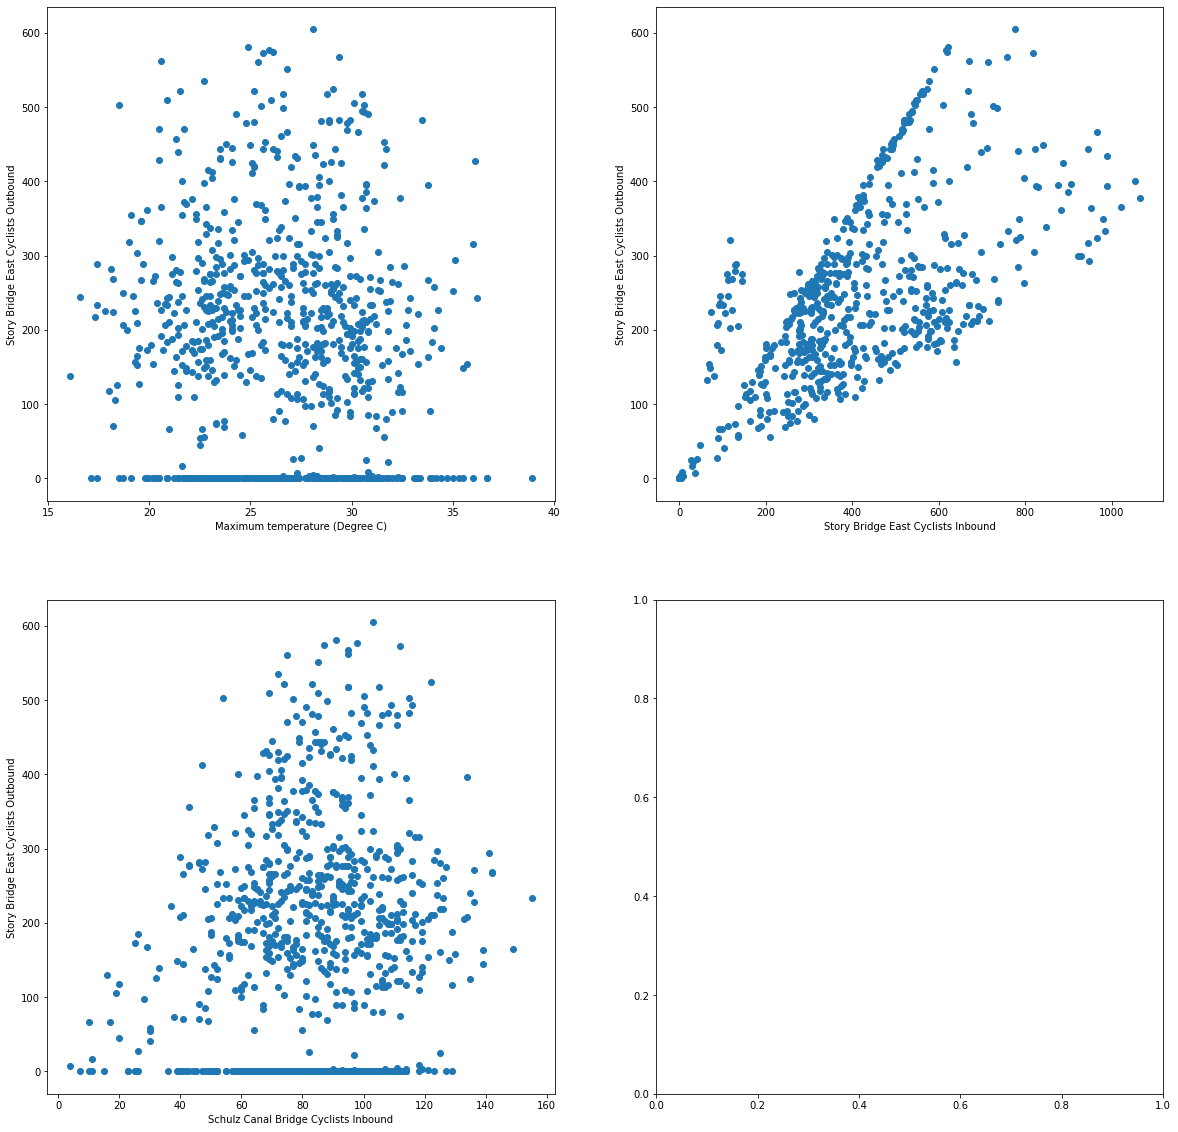

In [636]:

fig, axe = plt.subplots(int(len(X_vars)/2)+1,2, figsize=(20,20))

axe = axe.flatten()
for i, var in enumerate (X_vars):
    axe[i].set_xlabel(var)
    axe[i].set_ylabel(Y_var[0])
    axe[i].scatter(x=X_train[var], y=Y_train[Y_var[0]])

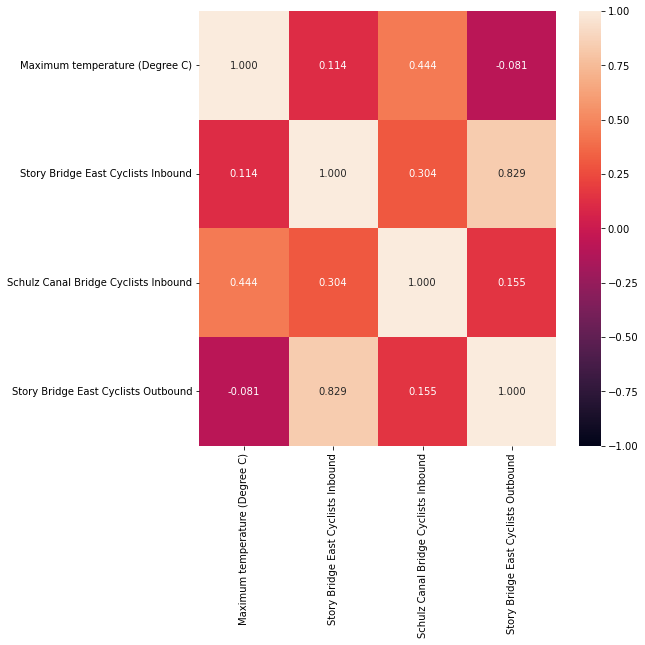

In [637]:
all_vars = X_vars + Y_var
correlation_of_coefficients = train_data[all_vars].corr()
correlation_of_coefficients
fig, axe = plt.subplots(1,1, figsize=(8,8))
axe = sns.heatmap(correlation_of_coefficients, annot=True, fmt="1.3f", vmin=-1, vmax=1)

In [638]:
X_train = sm.add_constant(X_train)
first_model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
print(X_train.shape)
first_model.params

(888, 4)


const                                   210.194445
Maximum temperature (Degree C)           -6.321071
Story Bridge East Cyclists Inbound        0.511994
Schulz Canal Bridge Cyclists Inbound     -0.210713
dtype: float64

In [639]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     Story Bridge East Cyclists Outbound   R-squared:                       0.720
Model:                                             OLS   Adj. R-squared:                  0.719
Method:                                  Least Squares   F-statistic:                     757.5
Date:                                 Wed, 09 Mar 2022   Prob (F-statistic):          9.87e-244
Time:                                         15:05:08   Log-Likelihood:                -5147.9
No. Observations:                                  888   AIC:                         1.030e+04
Df Residuals:                                      884   BIC:                         1.032e+04
Df Model:                                            3                                         
Covariance Type:                             nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  210.1944     18.477     11.376      0.000     173.930     246.458
Maximum temperature (Degree C)          -6.3211      0.765     -8.268      0.000      -7.822      -4.821
Story Bridge East Cyclists Inbound       0.5120      0.011     45.919      0.000       0.490       0.534
Schulz Canal Bridge Cyclists Inbound    -0.2107      0.134     -1.568      0.117      -0.475       0.053
==============================================================================
Omnibus:                       89.900   Durbin-Watson:                   0.471
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.645
Skew:                           0.804   Prob(JB):                     1.72e-26
Kurtosis:                       3.787   Cond. No.                     2.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

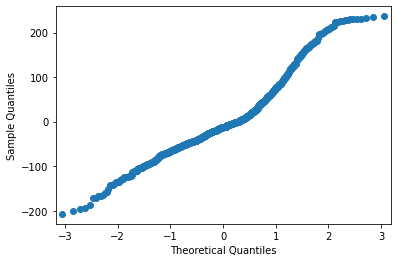

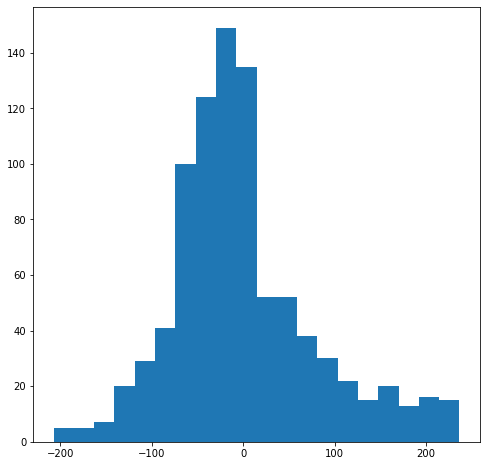

In [640]:
def plot_qq_and_hist(model):
    sm.qqplot(model.resid)
    fig = plt.figure(figsize=[8, 8])
    ax = fig.add_subplot(1, 1, 1)
    ax.hist(model.resid, 20)

plot_qq_and_hist(first_model)

### Step 5: Refine the Model, and Evaluate the results

Based on model outputs and other data such as correlation, try to improve the model.

Remove terms that look unhelpful. After a term is removed, evaluate the model on the validation and testing sets.

In [641]:
unhelpful_terms = ['Schulz Canal Bridge Cyclists Inbound']
print(X_vars)
for term in unhelpful_terms:
    X_vars.remove(term)
X_train_second_model = train_data[X_vars]
X_val_second_model = validation_data[X_vars]
print(X_train_second_model.shape)
# train the new model
X_train_second_model = sm.add_constant(X_train_second_model)
print(X_train_second_model.shape)

second_model = sm.OLS(Y_train, X_train_second_model).fit()

second_model.params

['Maximum temperature (Degree C)', 'Story Bridge East Cyclists Inbound', 'Schulz Canal Bridge Cyclists Inbound']
(888, 2)
(888, 3)


const                                 207.882952
Maximum temperature (Degree C)         -6.839886
Story Bridge East Cyclists Inbound      0.507030
dtype: float64

In [642]:
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     Story Bridge East Cyclists Outbound   R-squared:                       0.719
Model:                                             OLS   Adj. R-squared:                  0.719
Method:                                  Least Squares   F-statistic:                     1133.
Date:                                 Wed, 09 Mar 2022   Prob (F-statistic):          8.85e-245
Time:                                         15:05:09   Log-Likelihood:                -5149.1
No. Observations:                                  888   AIC:                         1.030e+04
Df Residuals:                                      885   BIC:                         1.032e+04
Df Model:                                            2                                         
Covariance Type:                             nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                207.8830     18.433     11.278      0.000     171.705     244.061
Maximum temperature (Degree C)        -6.8399      0.690     -9.917      0.000      -8.194      -5.486
Story Bridge East Cyclists Inbound     0.5070      0.011     47.388      0.000       0.486       0.528
==============================================================================
Omnibus:                       88.483   Durbin-Watson:                   0.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.813
Skew:                           0.801   Prob(JB):                     7.10e-26
Kurtosis:                       3.753   Cond. No.                     2.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

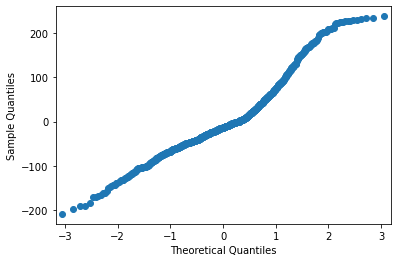

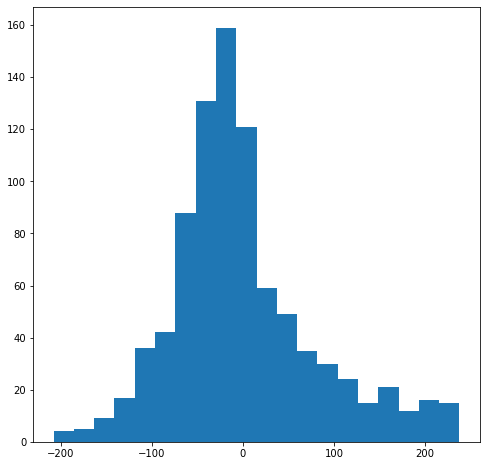

In [643]:
plot_qq_and_hist(second_model)

Make predictions

In [644]:
print(X_train.shape)
X_val = sm.add_constant (X_val)
X_val_second_model = sm.add_constant(X_val_second_model)


(888, 4)


In [645]:

train_pred_first_model = first_model.predict(X_train)
val_pred_first_model = first_model.predict(X_val)

test_pred_first_model = first_model.predict( sm.add_constant(X_test))

print(X_train_second_model.shape)
print(X_val.shape)
train_pred_second_model = second_model.predict(X_train_second_model)
val_pred_second_model = second_model.predict(X_val_second_model)
test_pred_second_model = second_model.predict( sm.add_constant(X_test[X_vars]))



(888, 3)
(276, 4)


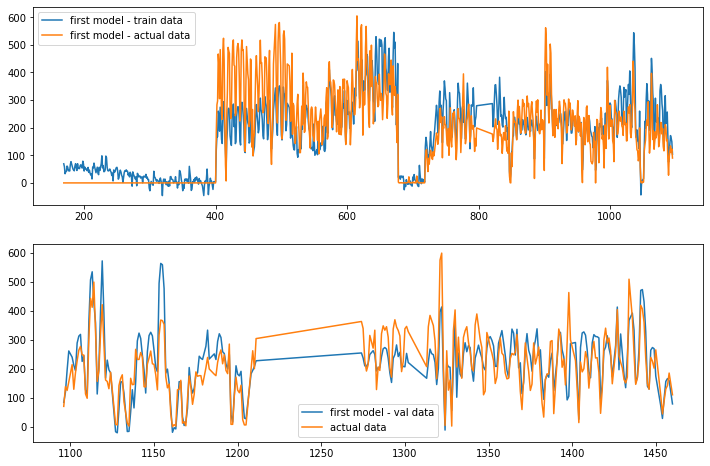

In [646]:

fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(2,1,1)
ax.plot(train_pred_first_model,label="first model - train data")
ax.plot(Y_train, label="first model - actual data")
ax.legend()

ax = fig.add_subplot(2,1,2)
ax.plot(val_pred_first_model,label="first model - val data")
ax.plot(Y_val, label="actual data")
ax.legend()

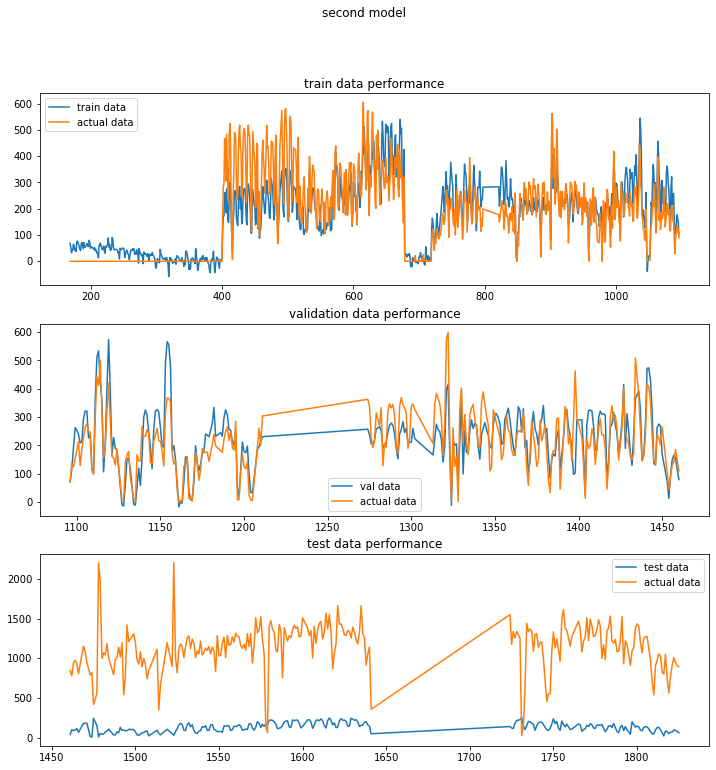

In [651]:
fig = plt.figure(figsize=[12,12])
fig.suptitle("second model")

ax = fig.add_subplot(3,1,1)
ax.set_title("train data performance")
ax.plot(train_pred_second_model,label="train data")
ax.plot(Y_train, label="actual data")
ax.legend()

ax = fig.add_subplot(3,1,2)
ax.set_title("validation data performance")
ax.plot(val_pred_second_model,label="val data")
ax.plot(Y_val, label="actual data")
ax.legend()

ax = fig.add_subplot(3,1,3)
ax.set_title("test data performance")
ax.plot(test_pred_second_model,label="test data")
ax.plot(Y_test, label="actual data")
ax.legend()

In [648]:
def compute_RMSE(predicted, actual):
    return np.sqrt(np.mean((predicted - actual)**2))

In [649]:
RMSE_train_first_model = compute_RMSE(train_pred_first_model, Y_train["Story Bridge East Cyclists Outbound"])
RMSE_train_second_model = compute_RMSE(train_pred_second_model, Y_train["Story Bridge East Cyclists Outbound"])


RMSE_val_first_model = compute_RMSE(val_pred_first_model, Y_val["Story Bridge East Cyclists Outbound"])
RMSE_val_second_model = compute_RMSE(val_pred_second_model, Y_val["Story Bridge East Cyclists Outbound"])

RMSE_test_first_model = compute_RMSE(test_pred_first_model, Y_test["Story Bridge East Cyclists Outbound"])
RMSE_test_second_model = compute_RMSE(test_pred_second_model, Y_test["Story Bridge East Cyclists Outbound"])



In [650]:
print("RMSE_train_first_model",RMSE_train_first_model)
print("RMSE_val_first_model",RMSE_val_first_model)
print("RMSE_test_first_model",RMSE_test_first_model)


print("RMSE_train_second_model",RMSE_train_second_model)
print("RMSE_val_second_model",RMSE_val_second_model)
print("RMSE_test_second_model",RMSE_test_second_model)

RMSE_train_first_model 79.69774737586425
RMSE_val_first_model 68.67994884214875
RMSE_test_first_model 1050.3002993091172
RMSE_train_second_model 79.80844719559293
RMSE_val_second_model 68.2330595086251
RMSE_test_second_model 1049.9963469389038
